In [1]:
from __future__ import print_function, division, absolute_import

## Setup Directories

In [12]:
import numpy as np
from shutil import copyfile, rmtree
from glob import glob
import os

def train_valid_test_split(SOURCE_DATA_DIR, TARGET_DATA_DIR, train_size=0.8, valid_size=0.1, 
                           COMBINE_FOLDERS=None, SELECT_FOLDERS=None):

    if COMBINE_FOLDERS is None:
        COMBINE_FOLDERS = dict()
    for folder_name in ["train", "test", "valid"]:
        rmtree(os.path.join(TARGET_DATA_DIR, folder_name), ignore_errors=True)
        os.makedirs(os.path.join(TARGET_DATA_DIR, folder_name))

    # Split records by 80-20 between Train and Validation Set
    filenames = np.random.permutation(glob(os.path.join(SOURCE_DATA_DIR, "*.jpg")))

    train_idx = int(len(filenames) * train_size)
    test_idx = int(len(filenames) * (train_size+valid_size))
    for idx, filename in enumerate(filenames):
        target_name = filename.split("/")[-1]
        if idx < train_idx:
            target_filepath = os.path.join(TARGET_DATA_DIR, "train", target_name)
        elif idx < test_idx:
            target_filepath = os.path.join(TARGET_DATA_DIR, "valid", target_name)
        else:
            target_filepath = os.path.join(TARGET_DATA_DIR, "test", target_name)            
        copyfile(filenames[idx], target_filepath)

In [13]:
SOURCE_DATA_DIR = "data/ClothingAttributeDataset/images/"
TARGET_DATA_DIR = "data/"

train_valid_test_split(SOURCE_DATA_DIR, TARGET_DATA_DIR)

In [16]:
!ls data/train | wc -l

1484


In [24]:
import numpy as np
from scipy.misc import imread, imsave, imresize
from matplotlib import pyplot as plt

%matplotlib inline

In [21]:
img = imread("data/train/000002.jpg")

In [26]:
img.shape

(751, 500, 3)

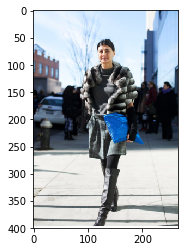

In [28]:
plt.imshow(imresize(img, (400, 266, 3)))

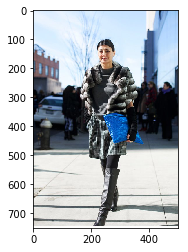

In [23]:
plt.imshow(img)